In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.linear_model import SGDClassifier, SGDRegressor

# a. Classification

In [3]:
col_names = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered', 'cnt']
# load dataset
df = pd.read_csv("/Users/swtoskon/Desktop/day.csv")
i=0
if i ==0:
    features=['season', 'yr', 'mnth', 'workingday','weathersit','temp','atemp','hum','windspeed']
    no_features = ['instant', 'dteday','holiday','weekday','casual','registered', 'cnt' ]
else : 
    features=['weathersit', 'atemp','hum',]
dX = df[features]
labels=['a0','a1','a2']
df['cntcat'], bins = pd.cut(df.cnt,bins=len(labels), labels=labels ,retbins=True)

bins

array([  13.308     , 2919.33333333, 5816.66666667, 8714.        ])

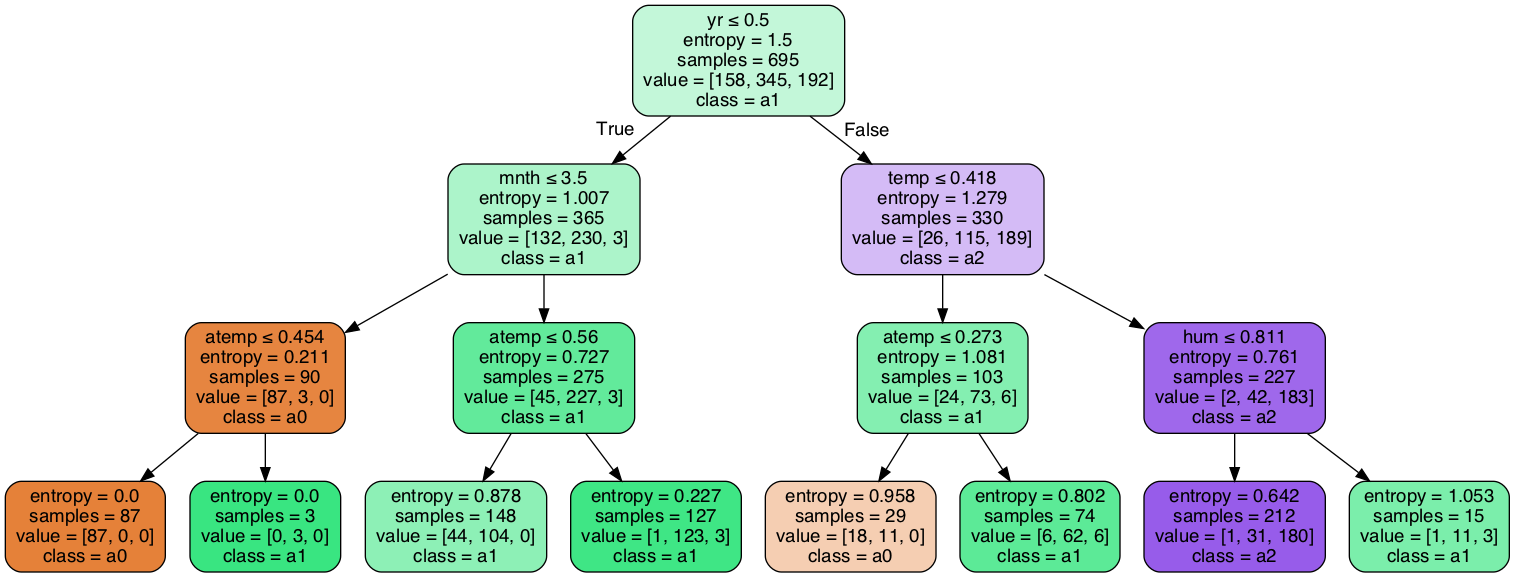

In [5]:
from sklearn.model_selection import KFold
from sklearn import metrics
from io import StringIO

#split dataset in features and target variable
feature_cols = ['season', 'yr', 'mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered']
X = df[features].values # Features
y = df.cntcat.values # Target variable

avg_acc_train = 0.0
avg_acc = 0.0
best_acc = 0.0
best_clf = None
kf = KFold(n_splits=20, shuffle=False, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    acc_train = metrics.accuracy_score(y_train, y_pred)
    y_pred = clf.predict(X_test)
    acc_test = metrics.accuracy_score(y_test, y_pred)
    avg_acc_train += acc_train / 20
    avg_acc += acc_test / 20
    if acc_test > best_acc:
        best_clf = clf
        best_acc = acc_test

    pred = best_clf.predict(X)
    actual_acc = metrics.accuracy_score(y, pred)
    klasses = best_clf.feature_importances_
avg_acc_train , avg_acc, best_clf.feature_importances_, features
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                feature_names=features,
                class_names=labels,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [6]:

avg_acc_train , avg_acc

(0.8538428047187612, 0.8148648648648645)

In [7]:
 best_clf.feature_importances_, features

(array([0.        , 0.3369517 , 0.07387339, 0.        , 0.        ,
        0.28075068, 0.22902101, 0.07940322, 0.        ]),
 ['season',
  'yr',
  'mnth',
  'workingday',
  'weathersit',
  'temp',
  'atemp',
  'hum',
  'windspeed'])

From the above calculation we see that 'yr' and 'temp' are the most important features

# b. Linear regression

In [8]:
col_names = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered', 'cnt']
df =pd.read_csv("/Users/swtoskon/Desktop/day.csv")
features= ['season', 'yr', 'mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
X = df[features]
y = df.cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
p_sum = [] ;# this holds the sum of y-y_hat, for all instances (ok, we habe only one instance)
epochs = 15 ;# number of epochs

-- Epoch 1
Norm: 576.31, NNZs: 1, Bias: 1674.500000, T: 1, Avg. loss: 485112.500000
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 56.84, NNZs: 1, Bias: 165.161678, T: 1, Avg. loss: 394135.323829
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 525.07, NNZs: 1, Bias: 1525.628785, T: 1, Avg. loss: 320219.853106
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 103.03, NNZs: 1, Bias: 299.349214, T: 1, Avg. loss: 260166.364504
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 483.44, NNZs: 1, Bias: 1404.676626, T: 1, Avg. loss: 211375.205387
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 140.55, NNZs: 1, Bias: 408.371447, T: 1, Avg. loss: 171734.257568
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 449.62, NNZs: 1, Bias: 1306.407629, T: 1, Avg. loss: 139527.505928
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 171.03, NNZs: 1, Bias: 496.947835, T: 1, Avg. loss: 113360.753911
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 422.14, NNZs: 1, Bias: 1226.567834, 

In [57]:
X = df[['temp']]
y = df['cnt']
n = 1 ;# number of instances to keep
X_train = X[:n].values
y_train = y[:n].values
learning_rate = 1.7

regressor = SGDRegressor(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
               average=False, random_state=2018, verbose=1)

In [58]:
p_sum = [] ;# this holds the sum of y-y_hat, for all instances (ok, we habe only one instance)
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model = regressor.partial_fit(X_train, y_train)
    #print(model.coef_)
    y = model.predict(X_train)
    p_sum.append(np.sum(y_train-y))
    #print(y, fy, np.sum(fy-y))

In [59]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))

## Learning rate a = 0.05

In [39]:
print(model.coef_)

[175.25116351]


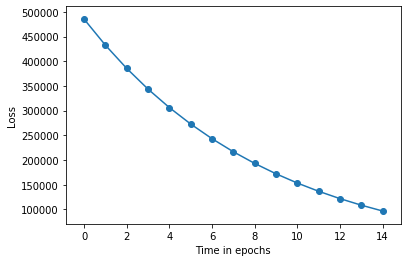

In [40]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

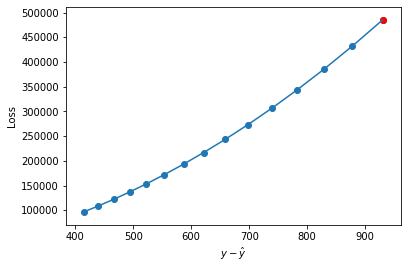

In [41]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

## Learning rate a = 0.5

In [52]:
print(model.coef_)

[303.1004102]


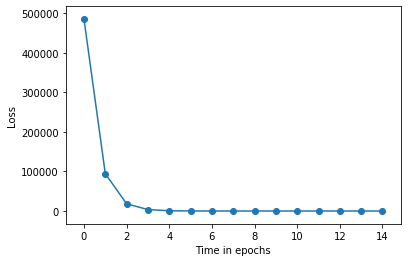

In [53]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

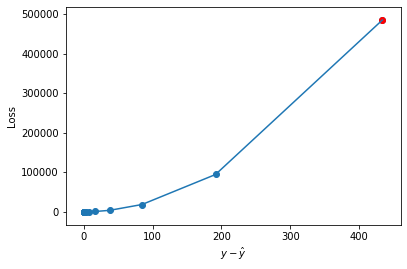

In [54]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

## Learning rate a = 1.7

In [60]:
print(model.coef_)

[366.94435696]


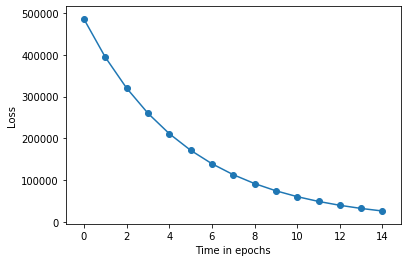

In [61]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

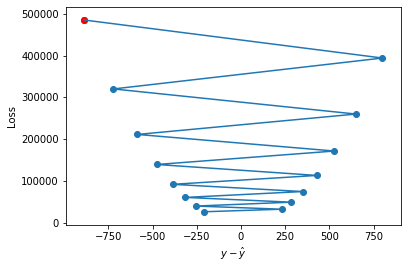

In [62]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()

# c. Logistic regression

In [99]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
features= ['season', 'yr', 'mnth', 'holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
X= df[['temp']]
Y = df['cnt']
labels=['few','many']
df['cntcat2'], bins = pd.cut(df.cnt,bins=len(labels), labels=labels ,retbins=True)
y_categorical = df['cntcat2']


In [100]:
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

In [101]:
n = 1 ;# number of instances to keep
fX = X[:n].values
fy = y_categorical[:n].values

In [102]:
learning_rate = 2


sgd  = SGDClassifier(loss="squared_loss", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)
sgd2 = SGDClassifier(loss="log", learning_rate='constant', eta0=learning_rate, penalty=None, max_iter=1,
                     average=False, random_state=2018, verbose=1)

In [103]:
p_sum  = [] ;# this holds the sum of y-y_hat, for all instances (ok, we have only one instance)
p2_sum = []
epochs = 15 ;# number of epochs

for epoch in range(epochs):
    model  = sgd.partial_fit(fX, fy, classes=labels)
    model2 = sgd2.partial_fit(fX, fy, classes=labels)
    #print(model.coef_)
    y  = model.predict(fX)
    p  = model.decision_function(fX)
    c  = (1 - np.mean(y == fy))
    p_sum.append(p)
    y2 = model2.predict(fX)
    p2 = model2.decision_function(fX)
    c2 = (1 - np.mean(y2 == fy))
    p2_sum.append(p2)
    #p = model.predict_proba(fX)
    #print(y, y2, fy, c, c2, p, p2)
    #p_sum.append(np.sum(fy-y))

In [104]:
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
#print(loss_history)
loss_list  = []
loss2_list = []
use_first = True
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    if use_first:
        loss_list.append(float(line.split("loss: ")[-1]))
    else:
        loss2_list.append(float(line.split("loss: ")[-1]))
    use_first = not use_first

In [105]:
print(model.coef_)
print(model2.coef_)

[[-7.77531449]]
[[-1.09013377]]


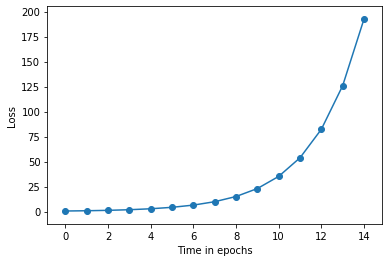

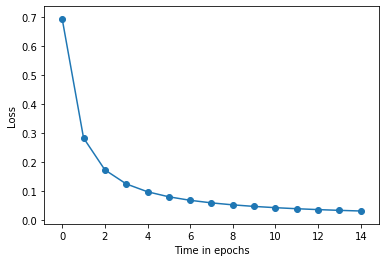

In [106]:
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.scatter(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(np.arange(len(loss2_list)), loss2_list)
plt.scatter(np.arange(len(loss2_list)), loss2_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()

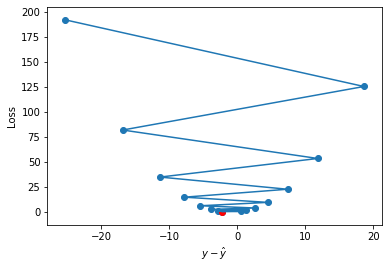

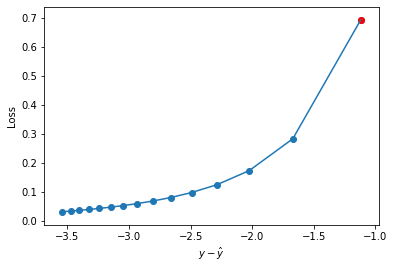

In [107]:
plt.figure()
plt.plot(p_sum, loss_list)
plt.scatter(p_sum, loss_list)
plt.scatter(p_sum[:1], loss_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()
plt.figure()
plt.plot(p2_sum, loss2_list)
plt.scatter(p2_sum, loss2_list)
plt.scatter(p2_sum[:1], loss2_list[:1], color='red')
plt.xlabel("$y-\hat{y}$")
plt.ylabel("Loss")
plt.show()